# **Install dependencies and preparing**

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Allows visualizations to be rendered directly
import seaborn as sns
import pingouin as pg
from dfply import *

# Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Define the path to your Excel file
excel_file_path = ".//BlockchainDataset.xlsx"

# Load each sheet into a pandas DataFrame
xls = pd.ExcelFile(excel_file_path)

# Create DataFrames for specific sheets
cnf = pd.read_excel(xls, sheet_name="config")
rst = pd.read_excel(xls, sheet_name="Results")
tst = pd.read_excel(xls, sheet_name="Test")
prd = pd.read_excel(xls, sheet_name="Prediction")

# Drop the 'Simulator No. Run' column from the 'rst' and 'cnf' DataFrames
if 'Simulator No. Run' in rst.columns:
    rst.drop('Simulator No. Run', inplace=True, axis=1)
if 'Simulator No. Run' in cnf.columns:
    cnf.drop('Simulator No. Run', inplace=True, axis=1)

# Display a summary to verify the loaded data
print("Config DataFrame:")
print(cnf.head())

print("\nResults DataFrame:")
print(rst.head())

print("\nTest DataFrame:")
print(tst.head())

print("\nPrediction DataFrame:")
print(prd.head())


Config DataFrame:
   No. of Node  No. of Miner  consensus Algorithm  \
0            4             1                    1   
1           11             1                    1   
2           13             1                    1   
3            6             1                    1   
4            9             1                    1   

   Total No of Transactions Per Sec  Max Block Size  Max Tx Size  Min Tx Size  \
0                              1650               1        0.064        0.001   
1                                18               1        0.064        0.001   
2                               519               1        0.064        0.001   
3                               682               1        0.064        0.001   
4                                66               1        0.064        0.001   

   Block Interval  Simulation Time  
0        0.050000                1  
1        0.064541                1  
2        0.083018                1  
3        0.069325           

# **Preprocessing**

**Configuration parameters**

This section will preprocess the configuration parameters found in the dataset.

In [2]:
#Creating a new variable named "BC" and assigns the value of the "cnf" variable to it.
BC = cnf


In [3]:
cnf.head()

,No. of Node,No. of Miner,consensus Algorithm,Total No of Transactions Per Sec,Max Block Size,Max Tx Size,Min Tx Size,Block Interval,Simulation Time
0,4,1,1,1650,1,0.064,0.001,0.050000,1
1,11,1,1,18,1,0.064,0.001,0.064541,1
2,13,1,1,519,1,0.064,0.001,0.083018,1
3,6,1,1,682,1,0.064,0.001,0.069325,1
4,9,1,1,66,1,0.064,0.001,0.070422,1


In [4]:
rst.head()

,Total No. of Blocks,Total No. of Blocks include Tx,Total No of Transactions,Total No. of Pending Tx,Total No. of Blocks without Tx,Avg. Block Size (MB),Avg. No. of Tx per block,Avg. of Tx Inclusion Time (secs),Avg. Tx Size (MB),Avg. Block Propagation (secs),Avg. Transaction Latency (secs),Transactions execution (secs),Transaction Throughput (Tx/secs)
0,39,38,1203,447,1,0.971577,30.84615,0.502852,0.031497,0.024703,0.182549,0.963436,1248.655264
1,14,13,18,0,1,0.038419,1.285714,0.515281,0.029882,0.064465,0.020857,0.902509,19.944397
2,25,24,519,0,1,0.677237,20.76,0.478234,0.032622,0.036483,0.033879,0.912084,569.026617
3,29,28,682,0,1,0.774474,23.51724,0.482088,0.032932,0.031878,0.035139,0.924465,737.723672
4,21,20,66,0,1,0.100100,3.142857,0.427433,0.031850,0.043434,0.022651,0.912115,72.359297


In [5]:
print("Descriptive Summary - Config:")
print(cnf.describe(include='all'))


Descriptive Summary - Config:
       No. of Node  No. of Miner  consensus Algorithm  \
count   184.000000         184.0                184.0   
mean      8.326087           1.0                  1.0   
std       3.724410           0.0                  0.0   
min       3.000000           1.0                  1.0   
25%       5.000000           1.0                  1.0   
50%       8.000000           1.0                  1.0   
75%      11.000000           1.0                  1.0   
max      15.000000           1.0                  1.0   

       Total No of Transactions Per Sec  Max Block Size   Max Tx Size  \
count                        184.000000           184.0  1.840000e+02   
mean                         504.793478             1.0  6.400000e-02   
std                          292.188503             0.0  1.391565e-17   
min                            9.000000             1.0  6.400000e-02   
25%                          264.000000             1.0  6.400000e-02   
50%               

In [6]:

print("\nDescriptive Summary - Results:")
print(rst.describe(include='all'))


Descriptive Summary - Results:
        Total No. of Blocks  Total No. of Blocks include Tx  \
count            184.000000                      184.000000   
unique                  NaN                             NaN   
top                     NaN                             NaN   
freq                    NaN                             NaN   
mean              25.755435                       24.755435   
std                5.827200                        5.827200   
min                9.000000                        8.000000   
25%               22.000000                       21.000000   
50%               25.000000                       24.000000   
75%               29.000000                       28.000000   
max               43.000000                       42.000000   

        Total No of Transactions  Total No. of Pending Tx  \
count                 184.000000               184.000000   
unique                       NaN                      NaN   
top                         

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(dataframe, title):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    dataframe[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(len(numeric_cols) // 3 + 1, 3))
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

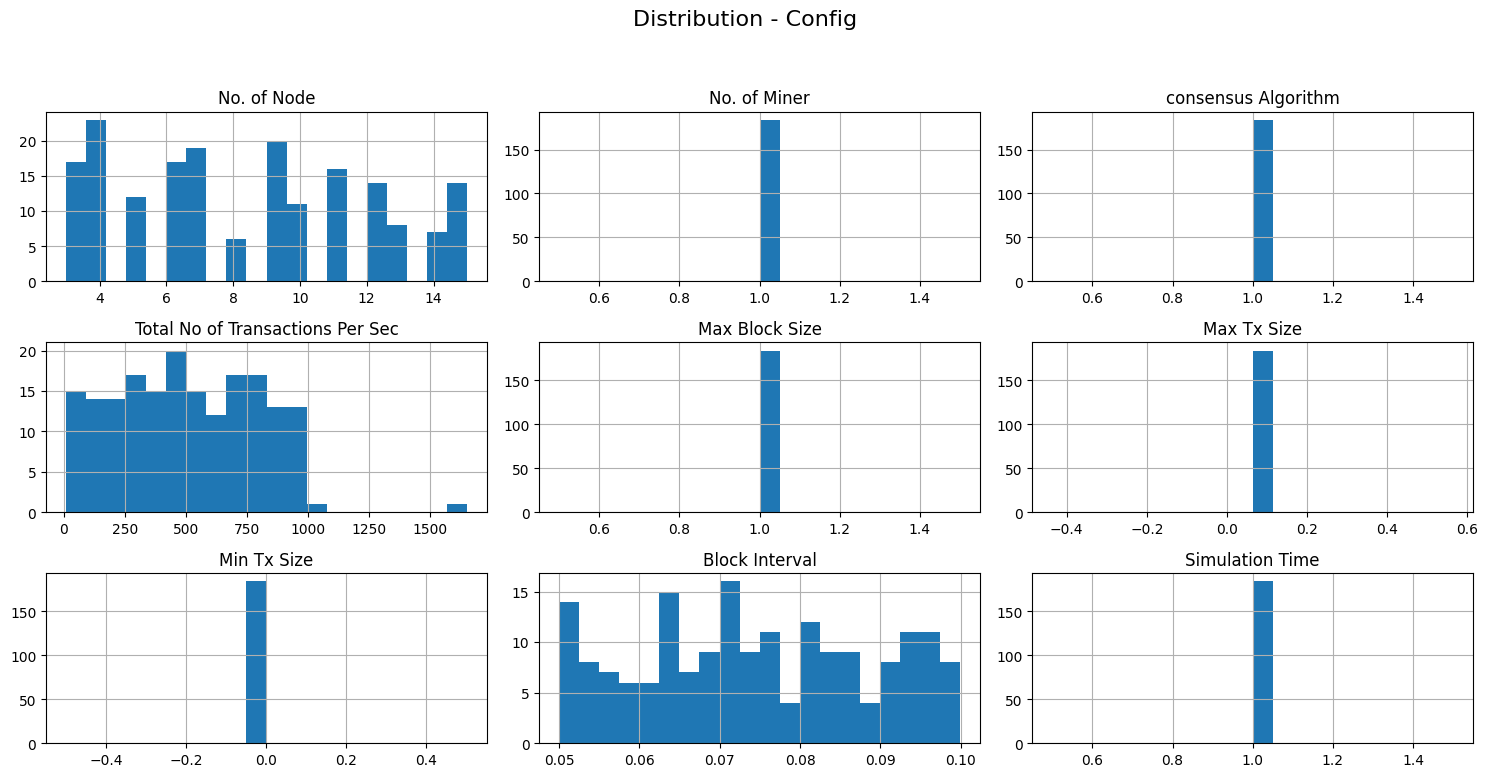

In [8]:
plot_histograms(cnf, "Distribution - Config")

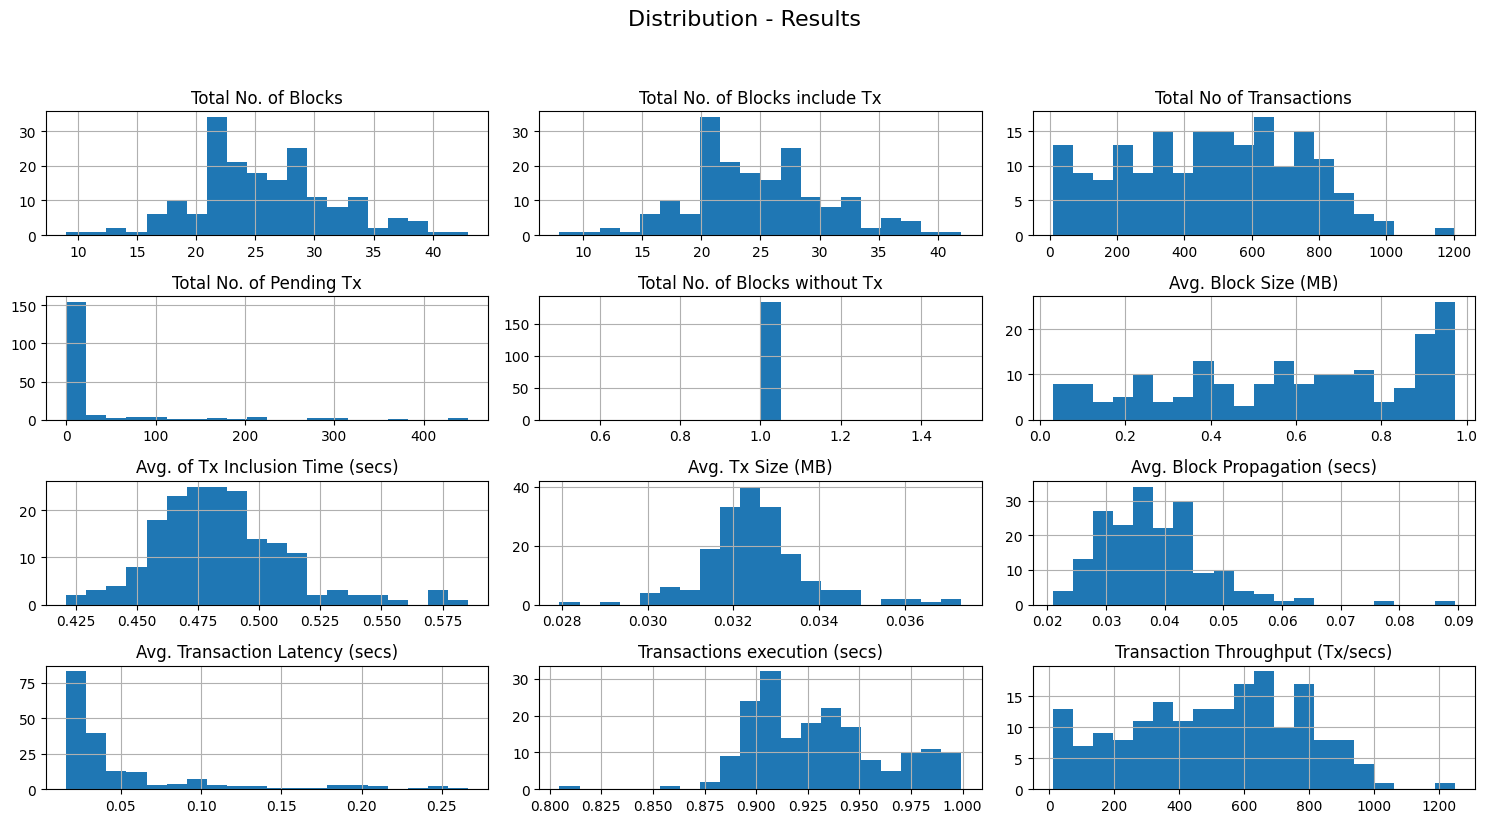

In [9]:
plot_histograms(rst, "Distribution - Results")

In [10]:
def plot_correlation_heatmap(dataframe, title):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) > 1: 
        plt.figure(figsize=(10, 8))
        corr_matrix = dataframe[numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title(title)
        plt.show()
    else:
        print(f"'{title}' - There are not enough numerical columns to generate the correlation matrix.")

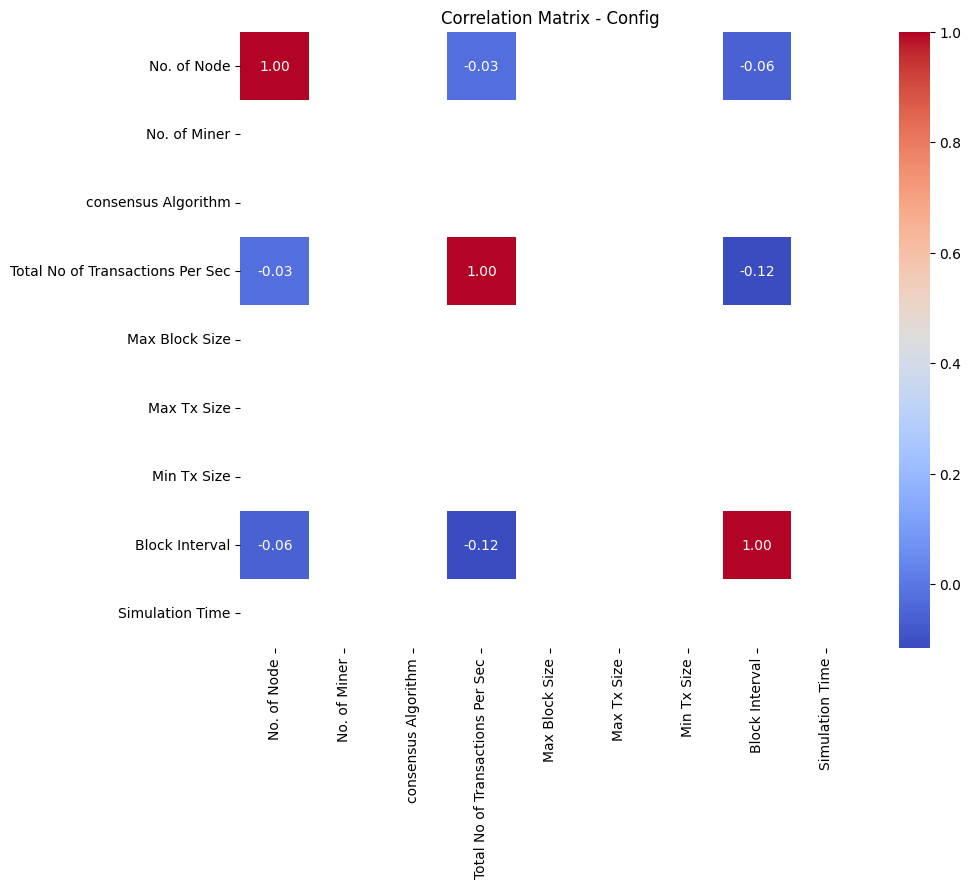

In [11]:

plot_correlation_heatmap(cnf, "Correlation Matrix - Config")


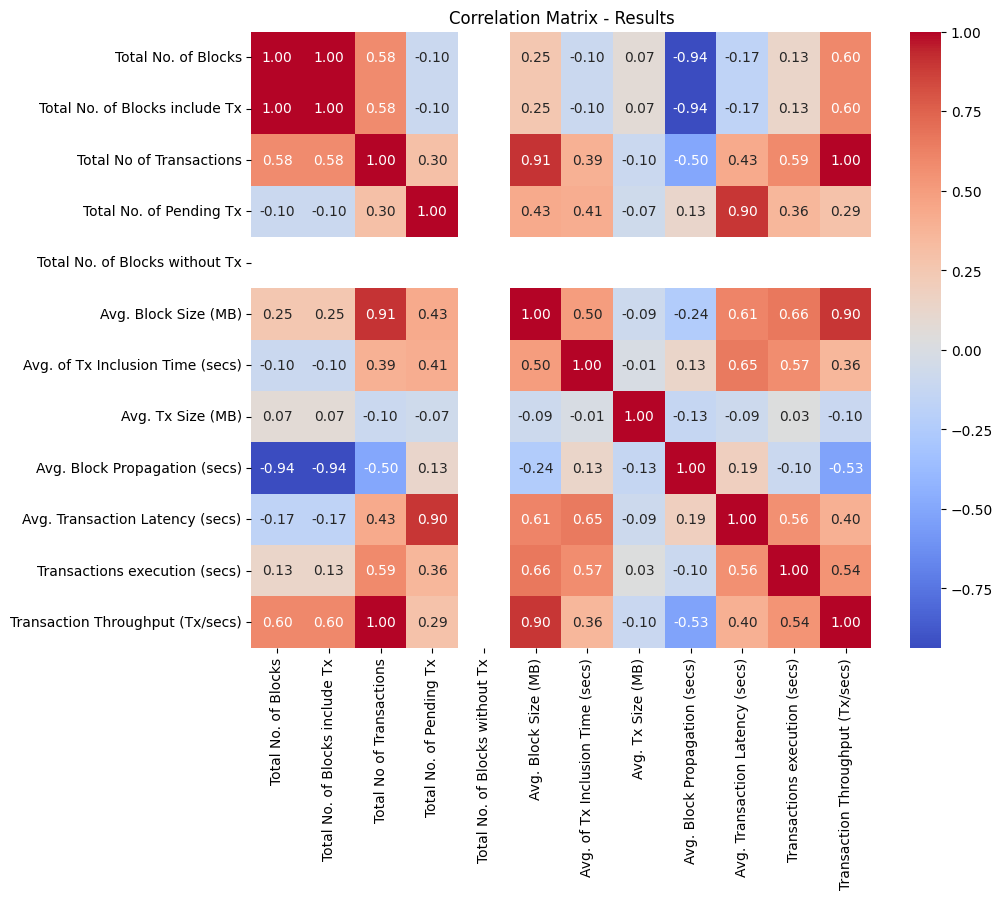

In [12]:
plot_correlation_heatmap(rst, "Correlation Matrix - Results")

In [13]:

def scatterplot_pairs(dataframe, col_x, col_y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe[col_x], y=dataframe[col_y])
    plt.title(title)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

if 'block_size' in rst.columns and 'latency' in rst.columns:
    scatterplot_pairs(rst, 'block_size', 'latency', "Relationship Between Block Size and Latency")


def plot_boxplot(dataframe, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataframe, x=x_col, y=y_col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

if 'block_type' in cnf.columns and 'transaction_count' in cnf.columns:
    plot_boxplot(cnf, 'block_type', 'transaction_count', "Boxplot - Block Type vs. Transaction Count")



# **Predication**

In [14]:
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import numpy as np
import pandas as pd
import optuna
import joblib
import os
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime

param_distributions = {
    'SVR': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30]
    },
    'KNN': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'num_leaves': [31, 64, 128],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'MLP': {
        'units_1': [32, 64, 128],
        'units_2': [16, 32, 64],
        'dropout': [0.1, 0.3, 0.5]
    },
    'TabNet': {
        'n_d': [8, 16, 32, 64],
        'n_a': [8, 16, 32, 64],
        'n_steps': [3, 5, 10],
        'gamma': [1.0, 1.5, 2.0],
        'lambda_sparse': [1e-6, 1e-5, 1e-4]
    }
}

C:\Users\wmrod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, units_1=64, units_2=32, dropout=0.5):
        self.units_1 = units_1
        self.units_2 = units_2
        self.dropout = dropout
        self.model = None

    def fit(self, X, y):
        self.model = self._build_model()
        self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def _build_model(self):
        from keras.models import Sequential
        from keras.layers import Dense, Dropout
        model = Sequential([
            Dense(self.units_1, activation='relu'),
            Dropout(self.dropout),
            Dense(self.units_2, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mse'])
        return model


In [ ]:
def calculate_metrics(y_true, y_pred):
    try:
        r2 = max(0, r2_score(y_true, y_pred))
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        return r2, rmse
    except Exception as e:
        print(f"Erro ao calcular métricas: {e}")
        return None, None

: 

In [ ]:
import os
import joblib
import optuna
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from catboost import CatBoostRegressor, CatBoostClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2

def train_svr(cnf, rst, save_dir, search_type='optuna', results=None, run=1):
    model_name = 'SVR'
    scaler = StandardScaler()

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training column {col_idx + 1} using {search_type}...")

            y = rst.iloc[:, col_idx]

            if cnf.isnull().any().any() or y.isnull().any():
                print(f"[{model_name}] Column {col_idx + 1} contains NaN. Skipping...")
                continue

            X = scaler.fit_transform(cnf.values)
            y = np.squeeze(y.values)

            if X.shape[0] > 10000:
                print(f"[{model_name}] Subsampling to 10,000 rows for efficiency.")
                indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
                X, y = X[indices], y[indices]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if search_type == 'optuna':
                study = optuna.create_study(direction='maximize')

                def objective(trial):
                    model_params = {
                        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
                        'C': trial.suggest_float('C', 0.1, 10.0, log=True),
                        'epsilon': trial.suggest_float('epsilon', 0.01, 1.0),
                    }
                    model = SVR(**model_params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    return r2_score(y_test, y_pred)

                study.optimize(objective, n_trials=10)
                best_params = study.best_params
                model = SVR(**best_params)

            elif search_type == 'grid':
                param_grid = {
                    'kernel': ['linear', 'rbf'],
                    'C': [0.1, 1, 10],
                    'epsilon': [0.01, 0.1, 1.0],
                }
                search = GridSearchCV(SVR(), param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
                search.fit(X_train, y_train)
                model = search.best_estimator_

            elif search_type == 'randomized':
                param_distributions = {
                    'kernel': ['linear', 'rbf'],
                    'C': [0.1, 1, 10],
                    'epsilon': [0.01, 0.1, 1.0],
                }
                search = RandomizedSearchCV(SVR(), param_distributions=param_distributions, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
                search.fit(X_train, y_train)
                model = search.best_estimator_

            else:
                model = SVR()

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            r2, rmse = calculate_metrics(y_test, y_pred)

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.pkl")
            joblib.dump(model, model_path)

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': model.get_params(),
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1} ({search_type}): R² = {r2:.4f}, RMSE = {rmse:.4f}")

        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")

def train_random_forest(cnf, rst, save_dir, search_type='optuna', results=None, run=1):
    model_name = 'RandomForest'
    model = RandomForestRegressor(random_state=42)
    params = param_distributions['RandomForest']

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training for column {col_idx + 1} using {search_type}...")
            y = rst.iloc[:, col_idx]

            if cnf.select_dtypes(include=['object']).shape[1] > 0 or y.dtype == 'object':
                print(f"[{model_name}] Correcting types for column {col_idx + 1}.")
                X = cnf.apply(pd.to_numeric, errors='coerce')
                y = pd.to_numeric(y, errors='coerce')
            else:
                X = cnf

            if y.isnull().any():
                print(f"[{model_name}] Column {col_idx + 1} contains NaN. Skipping...")
                continue
            if len(y.shape) == 1:
                y = y.values.reshape(-1, 1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if search_type == 'optuna':
                study = optuna.create_study(direction='maximize')

                def objective(trial):
                    model_params = {
                        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                        'max_depth': trial.suggest_int('max_depth', 10, 30),
                    }
                    model.set_params(**model_params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    return r2_score(y_test, y_pred)

                study.optimize(objective, n_trials=10)
                best_params = study.best_params
                model.set_params(**best_params)

            elif search_type == 'grid':
                search = GridSearchCV(model, param_grid=params, cv=5, scoring='r2')
                search.fit(X_train, y_train)
                model = search.best_estimator_

            elif search_type == 'randomized':
                search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='r2', random_state=42)
                search.fit(X_train, y_train)
                model = search.best_estimator_

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2, rmse = calculate_metrics(y_test, y_pred)

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.pkl")
            joblib.dump(model, model_path)

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': model.get_params(),
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1} ({search_type}): R² = {r2:.4f}, RMSE = {rmse:.4f}")
        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")

def train_linear_regression(cnf, rst, save_dir, search_type='none', results=None, run=1):
    model_name = 'LinearRegression'
    model = LinearRegression()

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training for column {col_idx + 1}...")
            y = rst.iloc[:, col_idx]

            if cnf.select_dtypes(include=['object']).shape[1] > 0 or y.dtype == 'object':
                print(f"[{model_name}] Correcting types for column {col_idx + 1}.")
                X = cnf.apply(pd.to_numeric, errors='coerce')
                y = pd.to_numeric(y, errors='coerce')
            else:
                X = cnf

            if y.isnull().any():
                print(f"[{model_name}] Column {col_idx + 1} contains NaN. Skipping...")
                continue
            if len(y.shape) == 1:
                y = y.values.reshape(-1, 1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2, rmse = calculate_metrics(y_test, y_pred)

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.pkl")
            joblib.dump(model, model_path)

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': model.get_params(),
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1}: R² = {r2:.4f}, RMSE = {rmse:.4f}")
        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")

def train_knn(cnf, rst, save_dir, search_type='optuna', results=None, run=1):
    model_name = 'KNN'
    model = KNeighborsRegressor()
    params = param_distributions['KNN']

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training for column {col_idx + 1} using {search_type}...")
            y = rst.iloc[:, col_idx]

            if cnf.select_dtypes(include=['object']).shape[1] > 0 or y.dtype == 'object':
                print(f"[{model_name}] Correcting types for column {col_idx + 1}.")
                X = cnf.apply(pd.to_numeric, errors='coerce')
                y = pd.to_numeric(y, errors='coerce')
            else:
                X = cnf

            if y.isnull().any():
                print(f"[{model_name}] Column {col_idx + 1} contains NaN. Skipping...")
                continue
            if len(y.shape) == 1:
                y = y.values.reshape(-1, 1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if search_type == 'optuna':
                study = optuna.create_study(direction='maximize')

                def objective(trial):
                    model_params = {
                        'n_neighbors': trial.suggest_int('n_neighbors', 3, 20),
                        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
                    }
                    model.set_params(**model_params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    return r2_score(y_test, y_pred)

                study.optimize(objective, n_trials=10)
                best_params = study.best_params
                model.set_params(**best_params)

            elif search_type == 'grid':
                search = GridSearchCV(model, param_grid=params, cv=5, scoring='r2')
                search.fit(X_train, y_train)
                model = search.best_estimator_

            elif search_type == 'randomized':
                search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='r2', random_state=42)
                search.fit(X_train, y_train)
                model = search.best_estimator_

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2, rmse = calculate_metrics(y_test, y_pred)

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.pkl")
            joblib.dump(model, model_path)

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': model.get_params(),
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1} ({search_type}): R² = {r2:.4f}, RMSE = {rmse:.4f}")
        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")

def train_xgboost(cnf, rst, save_dir, search_type='optuna', results=None, run=1):
    model_name = 'XGBoost'
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    params = param_distributions['XGBoost']

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training for column {col_idx + 1} using {search_type}...")
            y = rst.iloc[:, col_idx]

            if cnf.select_dtypes(include=['object']).shape[1] > 0 or y.dtype == 'object':
                print(f"[{model_name}] Correcting types for column {col_idx + 1}.")
                X = cnf.apply(pd.to_numeric, errors='coerce')
                y = pd.to_numeric(y, errors='coerce')
            else:
                X = cnf

            if y.isnull().any():
                print(f"[{model_name}] Column {col_idx + 1} contains NaN. Skipping...")
                continue
            if len(y.shape) == 1:
                y = y.values.reshape(-1, 1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if search_type == 'optuna':
                study = optuna.create_study(direction='maximize')

                def objective(trial):
                    model_params = {
                        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                        'max_depth': trial.suggest_int('max_depth', 3, 10),
                        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                    }
                    model.set_params(**model_params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    return r2_score(y_test, y_pred)

                study.optimize(objective, n_trials=10)
                best_params = study.best_params
                model.set_params(**best_params)

            elif search_type == 'grid':
                search = GridSearchCV(model, param_grid=params, cv=5, scoring='r2')
                search.fit(X_train, y_train)
                model = search.best_estimator_

            elif search_type == 'randomized':
                search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='r2', random_state=42)
                search.fit(X_train, y_train)
                model = search.best_estimator_

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2, rmse = calculate_metrics(y_test, y_pred)

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.pkl")
            joblib.dump(model, model_path)

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': model.get_params(),
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1} ({search_type}): R² = {r2:.4f}, RMSE = {rmse:.4f}")
        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")

def train_catboost(cnf, rst, save_dir, search_type='optuna', results=None, run=1):

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[CatBoost] Training column {col_idx + 1} using {search_type}...")

            y = rst.iloc[:, col_idx]

            if y.nunique() <= 1:
                print(f"[CatBoost] Column {col_idx + 1} contains constant values. Skipping...")
                continue

            if y.dtype == "object":
                print(f"[CatBoost] Converting non-numeric values in column {col_idx + 1}.")
                try:
                    y = pd.to_numeric(y, errors="coerce")
                except Exception as e:
                    print(f"[CatBoost] Error converting column {col_idx + 1}: {e}")
                    continue

            if y.nunique() == 2:
                task_type = "classification"
                model_class = CatBoostClassifier
                eval_metric = accuracy_score
                loss_function = "Logloss"
            else:
                task_type = "regression"
                model_class = CatBoostRegressor
                eval_metric = r2_score
                loss_function = "RMSE"

            X = cnf.values
            y = y.values
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            param_grid = {
                "iterations": [100, 200, 300],
                "depth": [4, 6, 8],
                "learning_rate": [0.01, 0.1, 0.2],
                "l2_leaf_reg": [1, 3, 5, 10],
            }

            if search_type == 'optuna':
                def objective(trial):
                    params = {
                        "iterations": trial.suggest_int("iterations", 100, 300),
                        "depth": trial.suggest_int("depth", 4, 8),
                        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
                        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
                        "loss_function": loss_function,
                        "verbose": 0,
                    }
                    model = model_class(**params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    return eval_metric(y_test, y_pred)

                study = optuna.create_study(direction="maximize")
                study.optimize(objective, n_trials=10)
                best_params = study.best_params

            elif search_type == 'grid':
                model = model_class(loss_function=loss_function, verbose=0)
                search = GridSearchCV(model, param_grid=param_grid, cv=3, scoring="r2")
                search.fit(X_train, y_train)
                best_params = search.best_params_

            elif search_type == 'randomized':
                model = model_class(loss_function=loss_function, verbose=0)
                search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3, scoring="r2", random_state=42)
                search.fit(X_train, y_train)
                best_params = search.best_params_

            model = model_class(**best_params, loss_function=loss_function, verbose=0)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            if task_type == "regression":
                r2 = r2_score(y_test, y_pred)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                print(f"[CatBoost] Column {col_idx + 1}: R² = {r2:.4f}, RMSE = {rmse:.4f}")
            else:
                accuracy = accuracy_score(y_test, y_pred)
                print(f"[CatBoost] Column {col_idx + 1}: Accuracy = {accuracy:.4f}")

            model_path = os.path.join(save_dir, f"CatBoost_col_{col_idx + 1}_{task_type}_{search_type}_run_{run}.cbm")
            model.save_model(model_path)

            if results is not None:
                results.append({
                    "column": col_idx + 1,
                    "task_type": task_type,
                    "search_type": search_type,
                    "params": best_params,
                    "r2_score" if task_type == "regression" else "accuracy": r2 if task_type == "regression" else accuracy,
                    "rmse": rmse if task_type == "regression" else None,
                })

        except Exception as e:
            print(f"[CatBoost] Error processing column {col_idx + 1}: {e}")

def train_lightgbm(cnf, rst, save_dir, search_type='optuna', results=None, run=1):
    model_name = 'LightGBM'
    model = LGBMRegressor(random_state=42)
    params = param_distributions['LightGBM']

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training column {col_idx + 1} using {search_type}...")
            y = rst.iloc[:, col_idx]

            if cnf.select_dtypes(include=['object']).shape[1] > 0 or y.dtype == 'object':
                print(f"[{model_name}] Correcting types for column {col_idx + 1}.")
                X = cnf.apply(pd.to_numeric, errors='coerce')
                y = pd.to_numeric(y, errors='coerce')
            else:
                X = cnf

            if y.isnull().any():
                print(f"[{model_name}] Column {col_idx + 1} contains NaN. Skipping...")
                continue
            if len(y.shape) == 1:
                y = y.values.reshape(-1, 1)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if search_type == 'optuna':
                study = optuna.create_study(direction='maximize')

                def objective(trial):
                    model_params = {
                        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
                        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                    }
                    model.set_params(**model_params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    return r2_score(y_test, y_pred)

                study.optimize(objective, n_trials=10)
                best_params = study.best_params
                model.set_params(**best_params)

            elif search_type == 'grid':
                search = GridSearchCV(model, param_grid=params, cv=5, scoring='r2')
                search.fit(X_train, y_train)
                model = search.best_estimator_

            elif search_type == 'randomized':
                search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='r2', random_state=42)
                search.fit(X_train, y_train)
                model = search.best_estimator_

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2, rmse = calculate_metrics(y_test, y_pred)

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.pkl")
            joblib.dump(model, model_path)

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': model.get_params(),
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1} ({search_type}): R² = {r2:.4f}, RMSE = {rmse:.4f}")
        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")

def train_mlp(cnf, rst, save_dir, search_type='optuna', results=None, run=1):
    model_name = 'MLP'

    os.makedirs(save_dir, exist_ok=True)

    for col_idx in range(rst.shape[1]):
        try:
            print(f"[{model_name}] Training column {col_idx + 1} using {search_type}...")

            y = rst.iloc[:, col_idx]
            X = cnf.apply(pd.to_numeric, errors='coerce').fillna(0)
            y = pd.to_numeric(y, errors='coerce').fillna(0)

            if y.isnull().any() or X.isnull().any().any():
                print(f"[{model_name}] Column {col_idx + 1} contains invalid values. Skipping...")
                continue

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            input_dim = X_train.shape[1]

            if search_type == 'optuna':
                study = optuna.create_study(direction='minimize')

                def objective(trial):
                    model_params = {
                        'units_1': trial.suggest_int('units_1', 32, 128),
                        'units_2': trial.suggest_int('units_2', 16, 64),
                        'dropout': trial.suggest_float('dropout', 0.1, 0.5),
                        'l2_reg': trial.suggest_float('l2_reg', 1e-5, 1e-2),
                    }
                    model = create_mlp(input_dim, model_params)
                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                    model.fit(
                        X_train, y_train,
                        epochs=200, batch_size=32, verbose=0, validation_split=0.2,
                        callbacks=[early_stopping]
                    )
                    y_pred = model.predict(X_test).flatten()
                    return np.sqrt(mean_squared_error(y_test, y_pred))

                study.optimize(objective, n_trials=50, timeout=600)
                best_params = study.best_params
                model = create_mlp(input_dim, best_params)
            else:
                default_params = {'units_1': 64, 'units_2': 32, 'dropout': 0.2, 'l2_reg': 1e-3}
                model = create_mlp(input_dim, default_params)

            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            model.fit(
                X_train, y_train,
                epochs=200, batch_size=32, verbose=0, validation_split=0.2,
                callbacks=[early_stopping]
            )
            y_pred = model.predict(X_test).flatten()

            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            model_path = os.path.join(save_dir, f"{model_name}_col_{col_idx + 1}_{search_type}_run_{run}.keras")
            model.save(model_path, save_format='keras')

            if results is not None:
                results.append({
                    'model': model_name,
                    'column': col_idx + 1,
                    'search_type': search_type,
                    'r2_score': r2,
                    'rmse': rmse,
                    'params': best_params if search_type == 'optuna' else default_params,
                    'run': run,
                })

            print(f"[{model_name}] Column {col_idx + 1} ({search_type}): R² = {r2:.4f}, RMSE = {rmse:.4f}")

        except Exception as e:
            print(f"[{model_name}] Error processing column {col_idx + 1}: {e}")


def create_mlp(input_dim, params):
    inputs = Input(shape=(input_dim,))
    x = Dense(params['units_1'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(inputs)
    x = Dropout(params['dropout'])(x)
    x = Dense(params['units_2'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(x)
    x = Dropout(params['dropout'])(x)
    outputs = Dense(1)(x)  

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def main(cnf, rst):
    global_save_dir = 'model_results_' + datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    os.makedirs(global_save_dir, exist_ok=True)

    search_methods = ['optuna', 'grid', 'randomized']

    train_functions = [
        train_svr,
        train_random_forest,
        train_linear_regression,
        train_knn,
        train_xgboost,
        train_catboost,
        train_lightgbm,
        train_mlp
    ]

    results = []

    thread_timeout = 600  # 10 minutes

    print("Starting parallel training...")

    with ThreadPoolExecutor(max_workers=5) as executor:
        futures = []
        for search_type in search_methods:
            for train_func in train_functions:
                for run in range(10): 
                    futures.append(
                        executor.submit(
                            train_func, cnf, rst, global_save_dir, search_type, results, run
                        )
                    )

        for future in futures:
            try:
                future.result(timeout=thread_timeout) 
            except TimeoutError:
                print(f"A thread exceeded the timeout limit of {thread_timeout} seconds.")
            except Exception as e:
                print(f"Error during training: {e}")

    results_df = pd.DataFrame(results)
    results_csv_path = os.path.join(global_save_dir, 'training_results.csv')
    results_df.to_csv(results_csv_path, index=False)
    print(f"Training complete. Results saved to: {results_csv_path}")

# start
main(cnf, rst)



In [ ]:
import os
import joblib
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Caminho base onde os modelos estão localizados
base_path = "./model_results_2024-11-26_17-49-06"
output_file = "training_results.csv"

# Função para processar os modelos
def process_models(cnf, rst, base_path):
    results = []
    
    for root, _, files in os.walk(base_path):
        for file in files:
            if not file.endswith(('.cbm', '.keras', '.pkl')):
                continue
            
            model_path = os.path.join(root, file)
            model_name = ""
            column = None
            search_type = None
            run = None
            r2 = None
            rmse = None
            params = None

            try:
                # Identifica o tipo de modelo
                if file.endswith(".cbm"):  # CatBoost
                    model = CatBoostRegressor()
                    model.load_model(model_path)
                    model_name = "CatBoost"
                    params = model.get_params()

                elif file.endswith(".pkl"):  # Modelos Pickle
                    model = joblib.load(model_path)
                    model_name = type(model).__name__
                    params = model.get_params()

                elif file.endswith(".keras"):  # Modelos Keras
                    model = load_model(model_path)
                    model_name = "MLP (Keras)"
                    params = {"keras_model": "Custom architecture"}  # Informação limitada

                # Extrai informações do nome do arquivo
                file_parts = os.path.splitext(file)[0].split('_')
                if len(file_parts) >= 5:
                    column = int(file_parts[2])  
                    search_type = file_parts[3]
                    run = int(file_parts[-1])

                # Dados de treino/teste
                y = rst.iloc[:, column]
                if cnf.select_dtypes(include=['object']).shape[1] > 0 or y.dtype == 'object':
                    X = cnf.apply(pd.to_numeric, errors='coerce')
                    y = pd.to_numeric(y, errors='coerce')
                else:
                    X = cnf

                if y.isnull().any():
                    print(f"[{model_name}] Column {column + 1} contains NaN. Skipping...")
                    continue

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Escalando dados para MLP
                if model_name == "MLP (Keras)":
                    scaler = StandardScaler()
                    X_train = scaler.fit_transform(X_train)
                    X_test = scaler.transform(X_test)

                # Fazendo previsões
                y_pred = model.predict(X_test).flatten()

                # Calculando métricas
                r2 = r2_score(y_test, y_pred)
                rmse = mean_squared_error(y_test, y_pred, squared=False)

                # Salvando os resultados
                results.append({
                    "model": model_name,
                    "column": column + 1,
                    "search_type": search_type,
                    "r2_score": r2,
                    "rmse": rmse,
                    "params": params,
                    "run": run
                })

                print(f"[{model_name}] Column {column + 1}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

            except Exception as e:
                print(f"Error processing {file}: {e}")

    return results


# Processa os modelos e salva os resultados
results = process_models(cnf, rst, base_path)
if results:
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")
else:
    print("No models processed or results found.")
